# 1️⃣ O que são APIs?

API (Application Programming Interface) é um meio de comunicação entre aplicações. No contexto web, utilizamos APIs REST para consumir dados de serviços como GitHub, Twitter, OpenAI, etc.

# 2️⃣ Consumindo APIs REST com requests

A biblioteca requests facilita requisições HTTP.

### Fazendo uma Requisição GET

In [2]:
import requests

resposta = requests.get("https://api.github.com")
print(resposta.status_code)  # 200 significa sucesso
print(resposta.json())  # Converte a resposta para um dicionário Python

200
{'current_user_url': 'https://api.github.com/user', 'current_user_authorizations_html_url': 'https://github.com/settings/connections/applications{/client_id}', 'authorizations_url': 'https://api.github.com/authorizations', 'code_search_url': 'https://api.github.com/search/code?q={query}{&page,per_page,sort,order}', 'commit_search_url': 'https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}', 'emails_url': 'https://api.github.com/user/emails', 'emojis_url': 'https://api.github.com/emojis', 'events_url': 'https://api.github.com/events', 'feeds_url': 'https://api.github.com/feeds', 'followers_url': 'https://api.github.com/user/followers', 'following_url': 'https://api.github.com/user/following{/target}', 'gists_url': 'https://api.github.com/gists{/gist_id}', 'hub_url': 'https://api.github.com/hub', 'issue_search_url': 'https://api.github.com/search/issues?q={query}{&page,per_page,sort,order}', 'issues_url': 'https://api.github.com/issues', 'keys_url': 'https://api

### Consumindo uma API com Autenticação
Muitas APIs exigem chaves de API.

In [ ]:
headers = {"Authorization": "Bearer SUA_CHAVE_API"}
resposta = requests.get("https://api.exemplo.com/dados", headers=headers)
print(resposta.json())

### 3️⃣ Enviando Dados via POST

In [ ]:
dados = {"nome": "Alice", "idade": 30}
resposta = requests.post("https://api.exemplo.com/usuarios", json=dados)
print(resposta.json())  

# 4️⃣ Web Scraping com BeautifulSoup

Se uma API não está disponível, podemos extrair dados diretamente do HTML usando Web Scraping.

### Instalando o BeautifulSoup

In [5]:
pip install beautifulsoup4 requests

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
from bs4 import BeautifulSoup
import requests

url = "https://quotes.toscrape.com/"
resposta = requests.get(url)
soup = BeautifulSoup(resposta.text, "html.parser")

# Pegando todas as citações
for quote in soup.find_all("span", class_="text"):
    print(quote.get_text())  

“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
“It is our choices, Harry, that show what we truly are, far more than our abilities.”
“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
“Try not to become a man of success. Rather become a man of value.”
“It is better to be hated for what you are than to be loved for what you are not.”
“I have not failed. I've just found 10,000 ways that won't work.”
“A woman is like a tea bag; you never know how strong it is until it's in hot water.”
“A day without sunshine is like, you know, night.”


## 📌 Exercícios Práticos

1️⃣ Faça um script que consuma a API do GitHub e liste os repositórios de um usuário.

In [9]:
resposta = requests.get("https://api.github.com/users/phmxavier/repos")
print(resposta.status_code)  # 200 significa sucesso
print(resposta.json())  # Converte a resposta para um dicionário Python

200
[{'id': 937824033, 'node_id': 'R_kgDON-YPIQ', 'name': 'estudos-python', 'full_name': 'phmxavier/estudos-python', 'private': False, 'owner': {'login': 'phmxavier', 'id': 28415483, 'node_id': 'MDQ6VXNlcjI4NDE1NDgz', 'avatar_url': 'https://avatars.githubusercontent.com/u/28415483?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/phmxavier', 'html_url': 'https://github.com/phmxavier', 'followers_url': 'https://api.github.com/users/phmxavier/followers', 'following_url': 'https://api.github.com/users/phmxavier/following{/other_user}', 'gists_url': 'https://api.github.com/users/phmxavier/gists{/gist_id}', 'starred_url': 'https://api.github.com/users/phmxavier/starred{/owner}{/repo}', 'subscriptions_url': 'https://api.github.com/users/phmxavier/subscriptions', 'organizations_url': 'https://api.github.com/users/phmxavier/orgs', 'repos_url': 'https://api.github.com/users/phmxavier/repos', 'events_url': 'https://api.github.com/users/phmxavier/events{/privacy}', 'received_events_ur

2️⃣ Extraia o título e as manchetes de um site de notícias usando Web Scraping.

In [21]:
from bs4 import BeautifulSoup
import requests

url = "https://www.cnnbrasil.com.br/"
resposta = requests.get(url)
soup = BeautifulSoup(resposta.text, "html.parser")

# Pegando todas as citações
for element in soup.find_all(["div", "figcaption"], class_=["block--manchetes__caption", "block--inline__caption", "block--manchetes-highlights-title-items"]):
    titulo = element.get_text()
    link = element.find("a")["href"] if element.find("a") else "Sem link"
    print(f"Título: {titulo}\nLink: {link}\n")



Título:   Conmebol aplica punições contra o Cerro Porteño após ato racista contra Luighi na Libertadores Sub-20  
Link: https://www.cnnbrasil.com.br/esportes/futebol/futebol-internacional/libertadores-da-america/conmebol-aplica-punicoes-contra-o-cerro-porteno-apos-ato-racista-com-luighi/

Título:   Israel diz que cortará eletricidade de Gaza "imediatamente" para garantir libertação total de reféns 
Link: https://www.cnnbrasil.com.br/internacional/israel-cortara-eletricidade-de-gaza-imediatamente-diz-ministro-da-energia/

Título:   Vítima toma máquina de cartão de golpista e consegue recuperar R$ 2 mil 
Link: https://www.cnnbrasil.com.br/nacional/sudeste/sp/vitima-toma-maquina-de-cartao-de-golpista-e-consegue-recuperar-r-2-mil/

Título:   Caso Vitória: veja imagens do momento em que suspeito é preso na Grande São Paulo 
Link: https://www.cnnbrasil.com.br/nacional/sudeste/sp/caso-vitoria-veja-imagens-do-momento-em-que-suspeito-e-preso/

Título:   Quem são os deputados do PL que STF julga

# 🎯 Desafio Extra
Analisande Tendências no GitHub

Crie um crawler que coleta os repositórios mais populares do GitHub na aba "Trending", analisa os temas mais comuns e gera um ranking das tecnologias mais populares.

In [ ]:
pip install matplotlib

📌 microsoft/OmniParser | 🏆 Jupyter Notebook | ⭐ 19,720 estrelas
📌 langgenius/dify | 🏆 TypeScript | ⭐ 79,951 estrelas
📌 LadybirdBrowser/ladybird | 🏆 C++ | ⭐ 35,154 estrelas
📌 geekan/MetaGPT | 🏆 Python | ⭐ 50,851 estrelas
📌 jingyaogong/minimind | 🏆 Python | ⭐ 15,233 estrelas
📌 unslothai/unsloth | 🏆 Python | ⭐ 33,958 estrelas
📌 infiniflow/ragflow | 🏆 TypeScript | ⭐ 43,492 estrelas
📌 codecrafters-io/build-your-own-x | 🏆 Markdown | ⭐ 351,207 estrelas
📌 FujiwaraChoki/MoneyPrinterV2 | 🏆 Python | ⭐ 10,952 estrelas
📌 RockChinQ/LangBot | 🏆 Python | ⭐ 9,257 estrelas
📌 78/xiaozhi-esp32 | 🏆 C++ | ⭐ 8,061 estrelas
📌 mendableai/firecrawl | 🏆 TypeScript | ⭐ 29,620 estrelas
📌 docmost/docmost | 🏆 TypeScript | ⭐ 11,771 estrelas
📌 massgravel/Microsoft-Activation-Scripts | 🏆 Batchfile | ⭐ 124,402 estrelas
📌 NirDiamant/GenAI_Agents | 🏆 Jupyter Notebook | ⭐ 8,698 estrelas
📌 virattt/ai-hedge-fund | 🏆 Python | ⭐ 15,220 estrelas
📌 harry0703/MoneyPrinterTurbo | 🏆 Python | ⭐ 24,967 estrelas
📌 sinaptik-ai/pandas-a

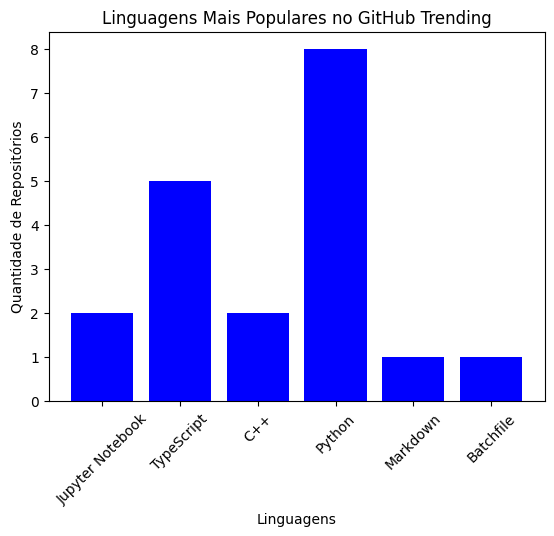

In [64]:
import requests
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib.pyplot as plt

def buscar_trending_github():
    url = "https://github.com/trending?since=monthly"
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}

    resposta = requests.get(url, headers=headers)
    soup = BeautifulSoup(resposta.text, "html.parser")

    repositorios = []
    linguagens = []

    for repo in soup.find_all("article", class_="Box-row"):
        nome = repo.find("h2").text.strip().replace("\n", "").replace(" ", "")
        linguagem_tag = repo.find("span", itemprop="programmingLanguage")
        linguagem = linguagem_tag.text.strip() if linguagem_tag else "Desconhecido"
        estrelas = repo.find("a", class_="Link--muted").text.strip()

        repositorios.append({"nome": nome, "linguagem": linguagem, "estrelas": estrelas})
        linguagens.append(linguagem)

    return repositorios, linguagens

repos, linguagens = buscar_trending_github()

# Exibir os repositórios coletados
for repo in repos:
    print(f"📌 {repo['nome']} | 🏆 {repo['linguagem']} | ⭐ {repo['estrelas']} estrelas")

# Criar gráfico das linguagens mais populares
contagem = Counter(linguagens)
plt.bar(contagem.keys(), contagem.values(), color="blue")
plt.xlabel("Linguagens")
plt.ylabel("Quantidade de Repositórios")
plt.title("Linguagens Mais Populares no GitHub Trending")
plt.xticks(rotation=45)
plt.show()